损失函数之分类损失
===
机器学习中的所有算法都依赖于最小化或最大化某一个函数，我们称之为“目标函数”。最小化的这组函数被称为“损失函数”。损失函数是衡量预测模型预测期望结果表现的指标。寻找函数最小值的最常用方法是“梯度下降”。把损失函数想象成起伏的山脉，梯度下降就像从山顶滑下，目的是到达山脉的最低点。没有一个损失函数可以适用于所有类型的数据。损失函数的选择取决于许多因素，包括是否有离群点，机器学习算法的选择，运行梯度下降的时间效率，是否易于找到函数的导数，以及预测结果的置信度。

损失函数可以大致分为两类：分类损失(Classification Loss)和回归损失(Regression Loss)。

# 1.0~1 Loss-01损失
基线，适用于二分类问题；二分类问题一般我们计算的都是$P(y=1)$的概率，对于$P(y=0)$的概率，使用的是$1-P(y=1)$。其实判别方法得到的都是正例的概率，也就是我们最关心的结果。
$$
L_{01}(i,j)=\begin{cases}
0 & i = j \\
1 & i \neq j
\end{cases}
$$
当真实值与预测值相等的时候，没有损失，所以是0，否则就是1

# 2.Hinge Loss-折页损失
Hinge Loss是机器学习领域中的一种损失函数，可用于“最大间隔(max-margin)”分类，其最著名的应用是作为SVM的目标函数。$\ell(y)=max(0,1-t \times y)$,$y$代表数据的真实分类；$t$代表计算出来的值，也就是$m$计算出来的值，约束条件为
$$
t(x)=\begin{cases}
1 & m \geq 0 \\
-1 & m < 0
\end{cases}
$$
$y \in \{-1,1\}$这是单个样本的损失值，至于整体样本的损失值，为
$$L(y)=\frac{1}{n}\sum_{i=1}^n\ell(y)$$

可以看到当$t \geq 1$的时候，$\ell(y)$一直取0，相当于整体的损失是没有影响的。只有当$t < 1$的时候，才会对整体的损失有影响。我们可以将t分为3段，分别可以得到三个预测结果
$$
\hat{y}=\begin{cases}
1 & t \geq 1 \\
1 & 0 < t < 1 \\
-1 & t \leq 0
\end{cases}
$$
具体到SVM中，当$t \geq 1$的时候，所对应的就是在支撑平面外的点，这些点对损失没有任何影响；当$0 < t < 1$所对应的就是支撑平面上的点，这些点必然也是对损失函数没有影响的；$t \leq 0$对应的就是支撑平面中间的点，以及完全分错的那些点，只有这些点才会对损失函数有影响。

# 3.Log Loss-对数损失，交叉熵损失
逻辑回归用的就是Log Loss，使用的就是用$-1$乘以对数似然函数，然后取最小值
$$
\begin{split}
L(w)&=-\frac{1}{N}\sum_{n=1}^NH(p_n,q_n) \\
&=-\frac{1}{N}\sum_{n=1}^N[y_nlog \hat{y_n} + (1-y_n)log(1-\hat{y_n})]
\end{split}
$$
信息论中叫做交叉熵。对于Log Loss来说，所有的样本都会对损失函数有影响。

# 4.Exp Loss-指数损失
AdaBoost算法使用的就是这个损失函数

# 5.Square Loss-平方损失
$$L(y,f(x))=(y-f(x))^2$$
因为把0预测成1和把0预测成8，对于0-1损失是一样的，但是对于平方损失是不一样的，这是不合理的。所以使用的很少

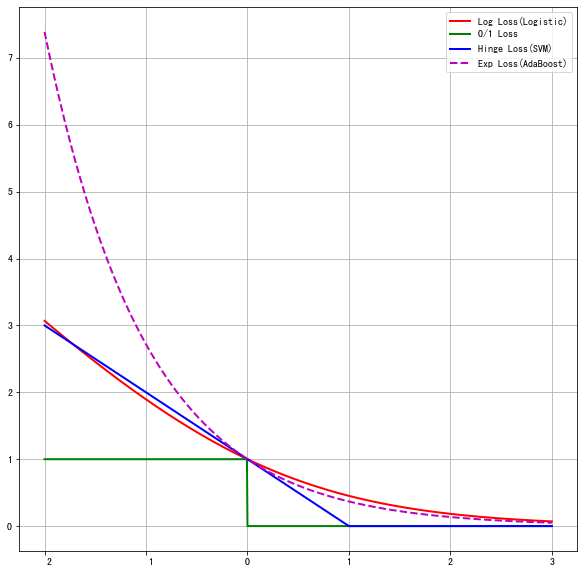

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.figure(figsize=(10, 10), facecolor='w')
plt.plot(x, y_logit, 'r-', label='Log Loss(Logistic)', linewidth=2)
plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', label='Hinge Loss(SVM)', linewidth=2)
plt.plot(x, y_boost, 'm--', label='Exp Loss(AdaBoost)', linewidth=2)
plt.grid()
plt.legend(loc='upper right')